In [1]:
from glob import glob
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import MDAnalysis as mda
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn

In [2]:
# Function to compute the distance between the atoms defining an isopeptide bond

def calculate_isopeptide_distance(pdb_names, sel_A, sel_B):
    """
        Compute distances between the selected atoms. The function
        return multiple values when multiple pdb_names OR multiframe
        pdb-s are used.
         pdb_names : a single pdb or a list of pdb-s
    """
    if type(pdb_names) is not list:
        pdb_names = [pdb_names,]

    u = mda.Universe(
        *pdb_names,
        all_coordinates = True,  # To use also the first frame.
    )

    ag_A = u.select_atoms(sel_A)
    ag_B = u.select_atoms(sel_B)

    distances = np.zeros((u.trajectory.n_frames))
    for i,ts in enumerate(u.trajectory):
        distances[i] = np.linalg.norm(ag_A.positions - ag_B.positions)
    
    return distances

In [3]:
# Compute the isopeptide bond length from the reference structures.

ref_models = [
              '5ymy',
              '6isu',
              '6tuv',
              '6ud0',
              '7keo',
              '7m4n',
              # '7uv5', UNRESOLVED LINKER
              # '7uyh', UNRESOLVED LINKER
              # '9avt', UNRESOLVED LINKER
             ]

ref_linkages = {'5ymy'     : ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
                '6isu'     : ["segid C and resid 27 and name CB", "segid B and resid 76 and name C"],
                '6tuv'     : ["segid H and resid 48 and name CB", "segid D and resid 76 and name C"],
                '6ud0'     : ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                '7keo'     : ["segid C and resid 29 and name CB", "segid D and resid 76 and name C"],
                '7m4n'     : ["segid F and resid 63 and name CB", "segid D and resid 76 and name C"],
                # '7uv5'     : ["segid B and resid 48 and name CB", "segid C and resid 76 and name C"], UNRESOLVED LINKER
                # '7uyh'     : ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"], UNRESOLVED LINKER
                # '9avt'     : ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"], UNRESOLVED LINKER
           }

ref_distances = {}
for ref_model in ref_models:
    print (ref_model)
    linkage = ref_linkages[ref_model]
    d = calculate_isopeptide_distance('references/'+ref_model+'.pdb', linkage[0], linkage[1])
    ref_distances[ref_model] = d

ref_merged = np.concatenate(list(ref_distances.values()))

5ymy
6isu
6tuv
6ud0
7keo
7m4n


In [21]:
# Compute the isopeptide bond length from the AF3 predictions without/with imposed bond.
# As the default AF3 predictions do not know about bonds, the chains must be permuted to
# allow linkages both ways (between A-K48 and B-G76 as well as A-G76 and B-K48)

# Valid combinations:
#  mode = bond, linker = NBU
#  mode = bond, linker = TME
#  mode = cys , linker = None 

mode = 'bond' # 'bond' # 'cys'
linker = 'NBU' # 'NBU' #'TME' # 'NBU'
if linker == 'TME' or linker == None:
    linker_suffix = ''
elif linker == 'NBU':
    linker_suffix = '-NBU'

model_dirs = [
               '5ymy',
              f'5ymy-{mode}',
               '6isu',
              f'6isu-{mode}',
               '6tuv',
              f'6tuv-{mode}',
               '6ud0',
              f'6ud0-{mode}',
               '7keo',
              f'7keo-{mode}',
               '7m4n',
              f'7m4n-{mode}',
              #  '7uv5',
              # f'7uv5-{mode}',
               '7uyh',
              f'7uyh-{mode}',
              #  '8c61',
              # f'8c61-{mode}',    
               '9avt',
              f'9avt-{mode}',
             ]

# Linkages reflecting the bonded connections
linkages = { '5ymy'       : ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
            f'5ymy-{mode}': ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
             '6isu'       : ["segid A and resid 27 and name CB", "segid B and resid 76 and name C"],
            f'6isu-{mode}': ["segid A and resid 27 and name CB", "segid B and resid 76 and name C"],
             '6tuv'       : ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
            f'6tuv-{mode}': ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
             '6ud0'       : ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
            f'6ud0-{mode}': ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
             '7keo'       : ["segid A and resid 29 and name CB", "segid B and resid 76 and name C"],
            f'7keo-{mode}': ["segid A and resid 29 and name CB", "segid B and resid 76 and name C"],
             '7m4n'       : ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
            f'7m4n-{mode}': ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
            #  '7uv5'       : ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
            # f'7uv5-{mode}': ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
             '7uyh'       : ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"],
            f'7uyh-{mode}': ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"],
            #  '8c61'       : ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
            # f'8c61-{mode}': ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
             '9avt'       : ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"],
            f'9avt-{mode}': ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"],
           }

# Alternative linkages with permuted chainID-s
# NOTE: there's no rerunning for the bonded systems. The entries are here only as placeholders
alt_linkages = { '5ymy'       : ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                f'5ymy-{mode}': ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                 '6isu'       : ["segid B and resid 27 and name CB", "segid A and resid 76 and name C"],
                f'6isu-{mode}': ["segid B and resid 27 and name CB", "segid A and resid 76 and name C"],
                 '6tuv'       : ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                f'6tuv-{mode}': ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                 '6ud0'       : ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                f'6ud0-{mode}': ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                 '7keo'       : ["segid B and resid 29 and name CB", "segid A and resid 76 and name C"],
                f'7keo-{mode}': ["segid B and resid 29 and name CB", "segid A and resid 76 and name C"],
                 '7m4n'       : ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                f'7m4n-{mode}': ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                #  '7uv5'       : ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                # f'7uv5-{mode}': ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                 '7uyh'       : ["segid B and resid  6 and name CB", "segid A and resid 76 and name C"],
                f'7uyh-{mode}': ["segid B and resid  6 and name CB", "segid A and resid 76 and name C"],
                #  '8c61'       : ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                # f'8c61-{mode}': ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                 '9avt'       : ["segid B and resid  6 and name CB", "segid A and resid 76 and name C"],
                f'9avt-{mode}': ["segid B and resid  6 and name CB", "segid A and resid 76 and name C"],
           }


distances = {}
# Loop over all model directories
for model_dir in model_dirs:
    
    print (model_dir, linker_suffix)
    if 'bond' in model_dir:
        # Get PDB names, and linkages for selection strings
        pdb_names = glob(f'{model_dir}{linker_suffix}/{model_dir}*pdb')
    else:
        pdb_names = glob(f'{model_dir}/{model_dir}*pdb')
    linkage = linkages[model_dir]
    
    # Compute and store the distnace
    d = calculate_isopeptide_distance(pdb_names, linkage[0], linkage[1])
    distances[model_dir] = d
    
    # Permute the predictions without isopeptide bond
    if not "bond" in model_dir and not "cys" in model_dir:
        print (f" Permuting {model_dir}")
        linkage = alt_linkages[model_dir]
        d = calculate_isopeptide_distance(pdb_names, linkage[0], linkage[1])
        distances[model_dir] = np.minimum(d, distances[model_dir])

5ymy -NBU
 Permuting 5ymy
5ymy-bond -NBU
6isu -NBU
 Permuting 6isu
6isu-bond -NBU
6tuv -NBU
 Permuting 6tuv
6tuv-bond -NBU
6ud0 -NBU
 Permuting 6ud0
6ud0-bond -NBU
7keo -NBU
 Permuting 7keo
7keo-bond -NBU
7m4n -NBU
 Permuting 7m4n
7m4n-bond -NBU
7uyh -NBU
 Permuting 7uyh
7uyh-bond -NBU
9avt -NBU
 Permuting 9avt
9avt-bond -NBU


In [22]:
# Transfrom the AF3 model data to pandas DataFrame
df = pd.DataFrame (distances)
df = df.melt(var_name='PDB', value_name='distance')
df[mode] = df['PDB'].apply(lambda x: 'yes' if mode in x else 'no')
df['PDB'] = df['PDB'].str.replace(f'-{mode}', '', regex=True)

Saving to AF3-isopeptide-bond-NBU.svg and AF3-isopeptide-bond-NBU.png


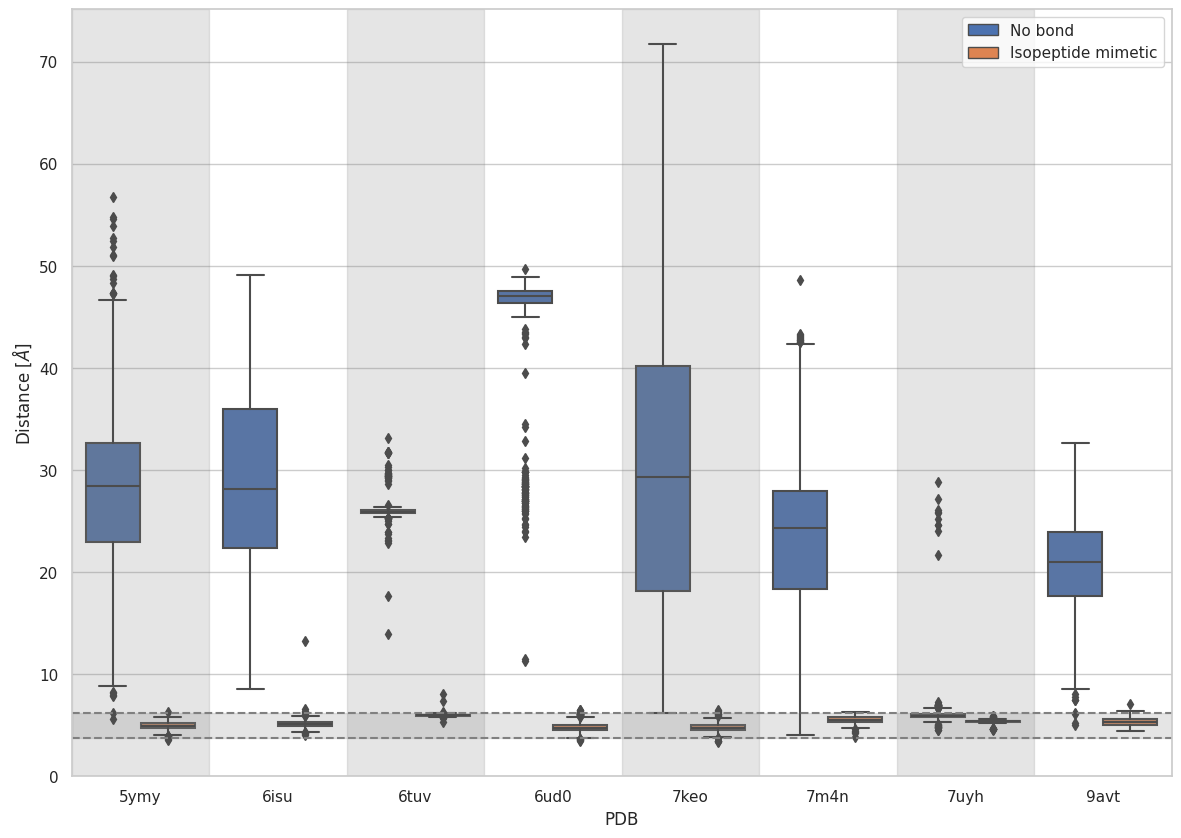

In [24]:
# Plot the distances

# use to set style of background of plot
seaborn.set_theme(rc={'figure.figsize':(11.7,8.27)})
seaborn.set(style="whitegrid")

# Use an editable font
plt.rcParams['svg.fonttype'] = 'none'
# Get the default color palette
colors = seaborn.color_palette()

fig = plt.figure(layout="constrained")
gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[:, :])

seaborn.boxplot(x="PDB", y="distance", hue=mode, data=df, ax=ax1)
ax1.set_ylabel(r'Distance [$\AA$]')

limits = ax1.get_xlim()
ax1.axvspan(-0.5, 0.5, color='gray', alpha=0.2)
ax1.axvspan( 1.5, 2.5, color='gray', alpha=0.2)
ax1.axvspan( 3.5, 4.5, color='gray', alpha=0.2)
ax1.axvspan( 5.5, 6.5, color='gray', alpha=0.2)
ax1.axvspan( 7.5, 8.5, color='gray', alpha=0.2)
ax1.set_xlim(limits)

ax1.axhspan(ref_merged.min(), ref_merged.max(), color='gray', alpha=0.2)
ax1.axhline(y=ref_merged.min(), color='gray', linestyle='--', label='y=10')
ax1.axhline(y=ref_merged.max(), color='gray', linestyle='--', label='y=10')

limits = list(ax1.get_ylim())
limits[0] = 0
ax1.set_ylim(limits)

# Create legend
if mode == 'bond':
    ax1.legend(title=None, labels=['No bond', 'Isopeptide mimetic'])
elif mode == 'cys':
    ax1.legend(title=None, labels=['No bond', 'Cys'])
leg = ax1.get_legend()
leg.legend_handles[0].set_facecolor(colors[0])
leg.legend_handles[1].set_facecolor(colors[1])
leg.legend_handles[0].set_linewidth(1)
leg.legend_handles[1].set_linewidth(1)
       
print (f"Saving to AF3-isopeptide-{mode}{linker_suffix}.svg and AF3-isopeptide-{mode}{linker_suffix}.png") 
plt.savefig(f"AF3-isopeptide-{mode}{linker_suffix}.svg", bbox_inches=0, transparent=True)
plt.savefig(f"AF3-isopeptide-{mode}{linker_suffix}.png", bbox_inches=0, transparent=False)
plt.show()

